# Nicholas Giordano - Information Visualization - Final Project

The assignment is simple: I want to see a 15-minute presentation with at least ten graphs. The graphs will aid in telling the story of crime in the city you are assigned. 

To keep the focus on data aggregating and visualization, I found and cleaned the datasets a little. Of course, you will need to clean the data further. Each group gets the crime dataset from a city in the USA, and each dataset is slightly different based on what the police department chose to record and report. 

We will discuss the project in greater detail in class. Feel free to talk to other groups to see what kind of graphs they are coming up with. Or talk to me!

### Loading Data

In [10]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from shapely.geometry import Point
import geopandas as gpd
from geopandas import datasets
from geopandas import GeoDataFrame

plt.style.use('ggplot')
sns.set_style('whitegrid')

file = "san_fran.csv"

df = pd.read_csv(file, low_memory=False)

df.head(10)

,X,Y,Incident Code,Category,Date,Time,PdDistrict,Resolution,Address
0,-122.436220,37.724377,26030,ARSON,2011-02-18,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV
1,-122.410541,37.770913,4134,ASSAULT,2010-11-21,17:00,SOUTHERN,NONE,400 Block of 10TH ST
2,-122.470366,37.745158,4134,ASSAULT,2013-04-02,15:50,TARAVAL,NONE,14TH AV / SANTIAGO ST
3,-122.403405,37.775421,4134,ASSAULT,2017-08-06,18:15,SOUTHERN,NONE,800 Block of BRYANT ST
4,-122.463545,37.707968,7020,VEHICLE THEFT,2016-03-03,19:30,TARAVAL,NONE,100 Block of BEPLER ST
5,-122.406832,37.796903,6244,LARCENY/THEFT,2012-12-21,19:15,CENTRAL,NONE,PACIFIC AV / GRANT AV
6,-122.410460,37.798371,65016,OTHER OFFENSES,2010-02-13,02:55,BAYVIEW,"ARREST, CITED",POWELL ST / VALLEJO ST
7,-122.408711,37.780971,65016,OTHER OFFENSES,2010-01-11,03:38,SOUTHERN,"ARREST, BOOKED",6TH ST / MISSION ST
8,-122.427363,37.794345,27195,TRESPASS,2012-08-17,20:30,NORTHERN,NONE,1900 Block of PACIFIC AV
9,-122.406521,37.785063,6362,LARCENY/THEFT,2010-02-23,17:57,SOUTHERN,"ARREST, CITED",800 Block of MARKET ST


### Proportion Plot of Top 10 Types of Crime

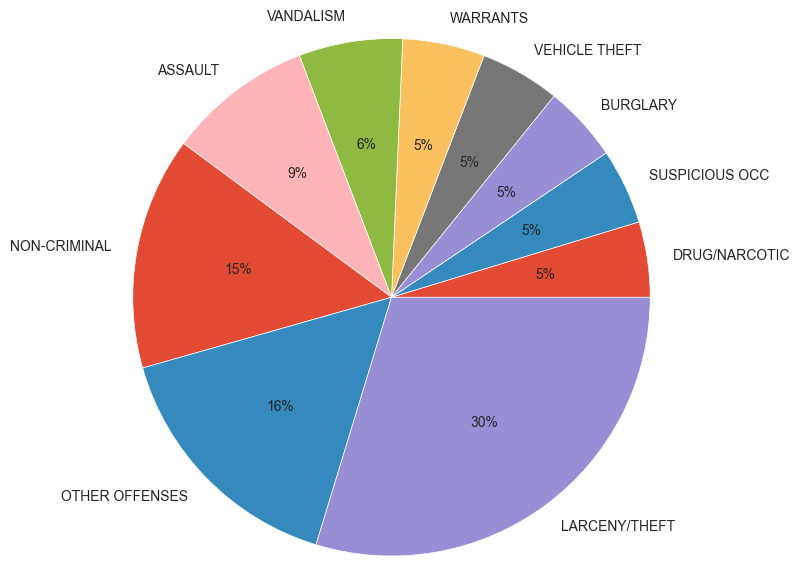

In [3]:
counts = df.value_counts("Category").head(10).sort_values(ascending=True)

top_10 = counts.head(10)

top_10['OTHER OFFENSES'] += counts.tail(counts.size - 10).values.sum()

plt.pie(top_10.values, labels=top_10.index, autopct='%.0f%%', radius=1.75)
plt.show()

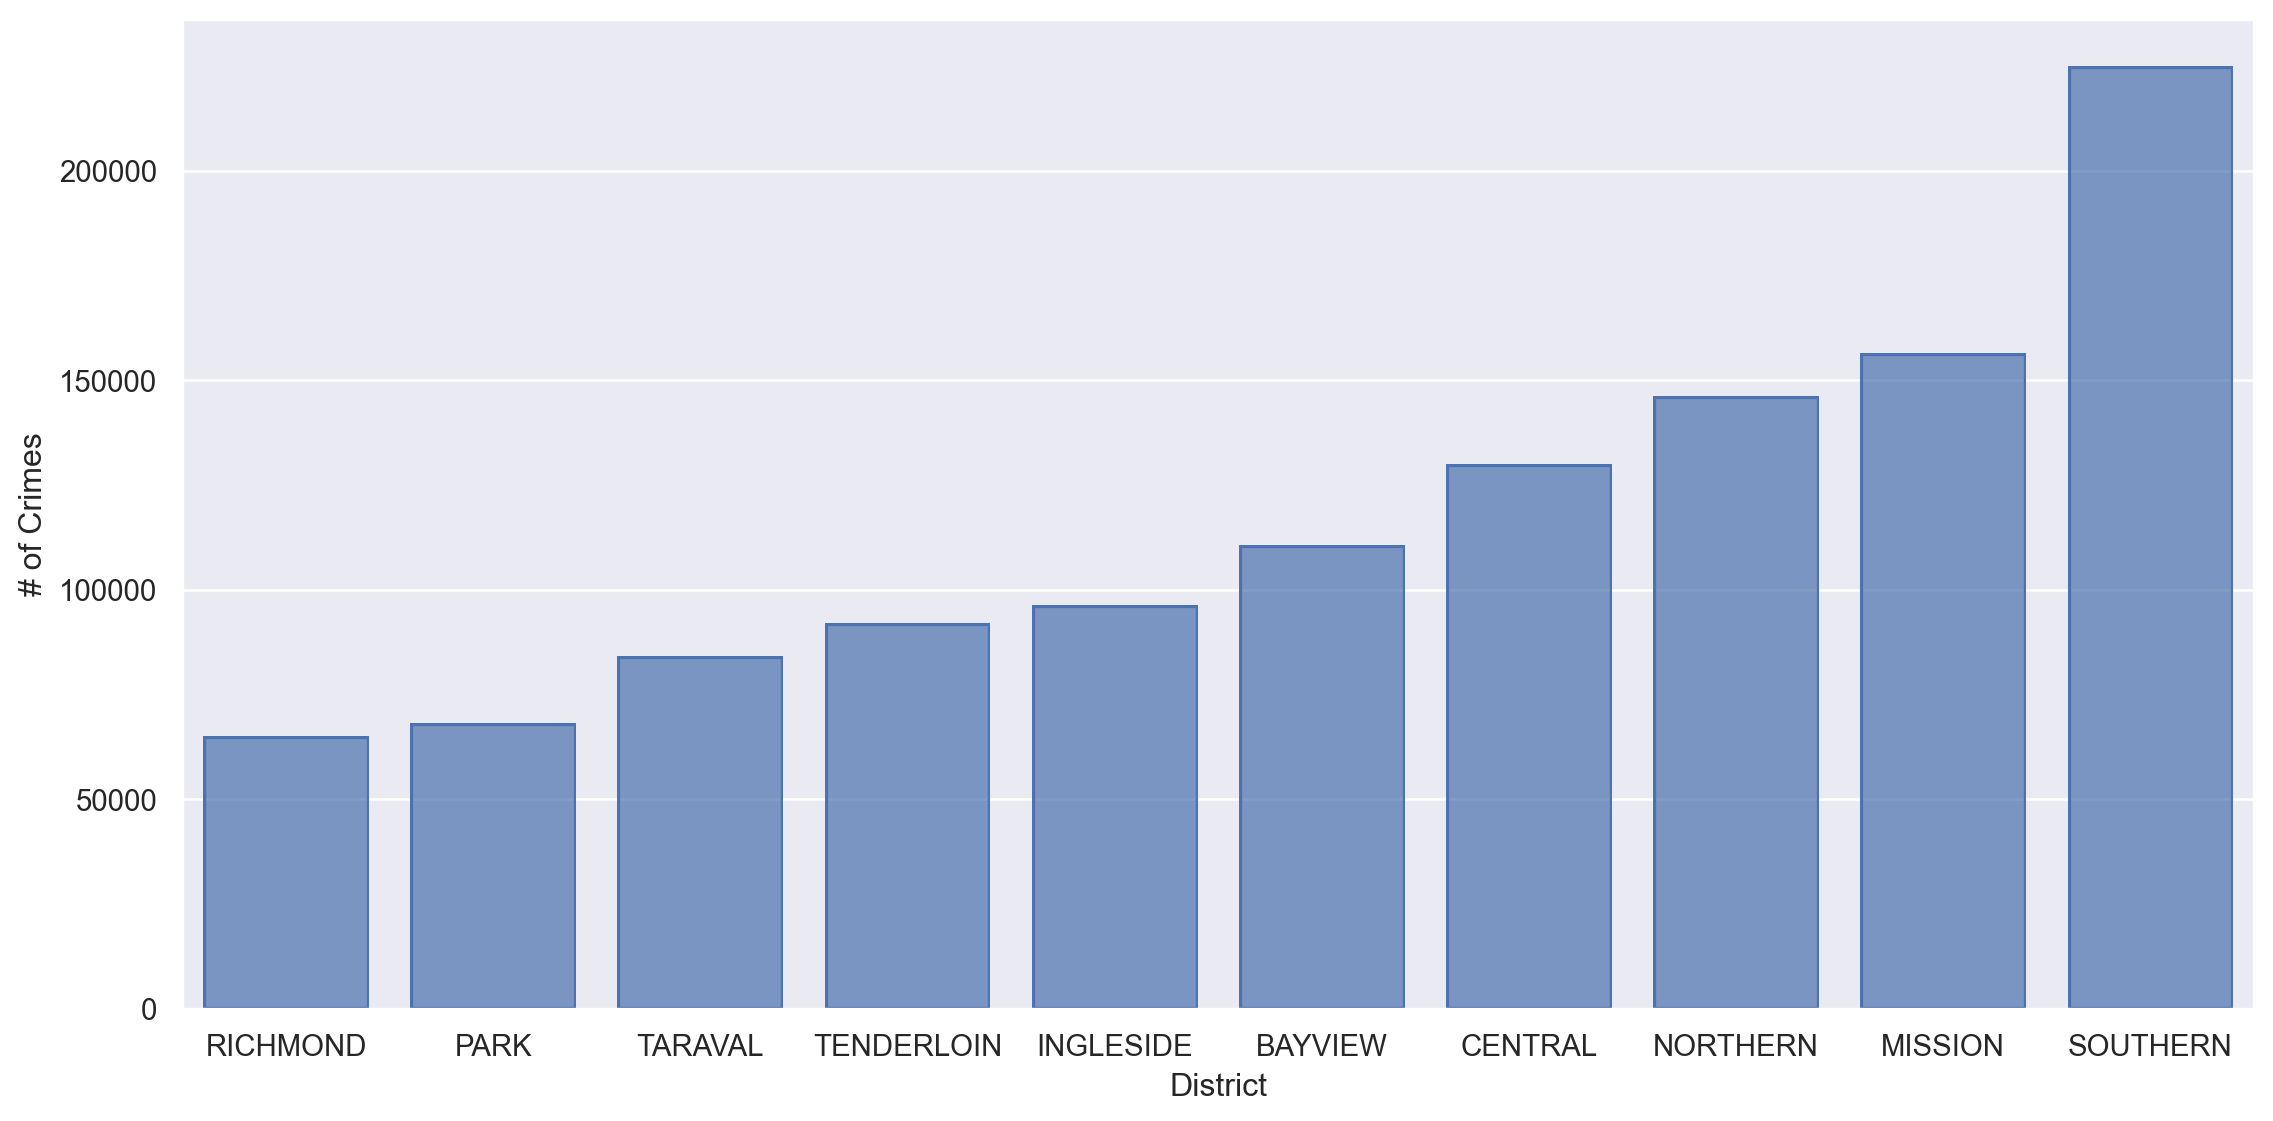

In [4]:
d_counts = df.value_counts("PdDistrict").sort_values(ascending=True)
so.Plot(x=d_counts.index, y=d_counts.values).add(so.Bar(width=0.8)).layout(size=(12, 6)).label(x="District", y="# of Crimes")


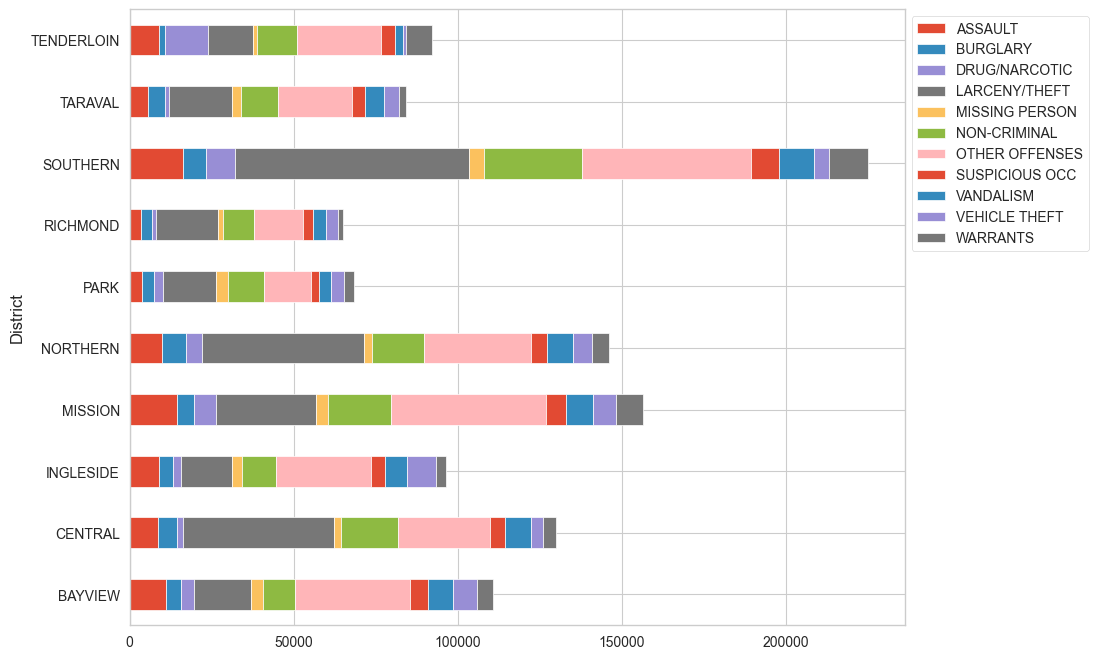

In [12]:
df2 = df.replace(['ROBBERY', 'FRAUD', 'SECONDARY CODES',
                  'WEAPON LAWS', 'TRESPASS', 'STOLEN PROPERTY',
                  'FORGERY/COUNTERFEITING', 'PROSTITUTION',
                  'SEX OFFENSES, FORCIBLE', 'RECOVERED VEHICLE',
                  'DRUNKENNESS', 'DISORDERLY CONDUCT',
                  'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING',
                  'ARSON', 'EMBEZZLEMENT', 'LIQUOR LAWS', 'LOITERING',
                  'SUICIDE', 'BRIBERY', 'EXTORTION', 'BAD CHECKS', 'GAMBLING',
                  'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
                  'OTHER OFFENSES')

d_proportions = (df2.groupby(['PdDistrict'])['Category'].apply(lambda x: x.value_counts(normalize=False)).unstack().fillna(0))
#d_proportions
d_proportions.plot(kind="barh", stacked=True, figsize=(10, 8), ylabel="District")
plt.legend(bbox_to_anchor=[1,1],loc='upper left')
plt.show()

### Geo Data Frame Mapping Crime Locations within San Francisco


Text(177.13242665174315, 0.5, 'Latitude')

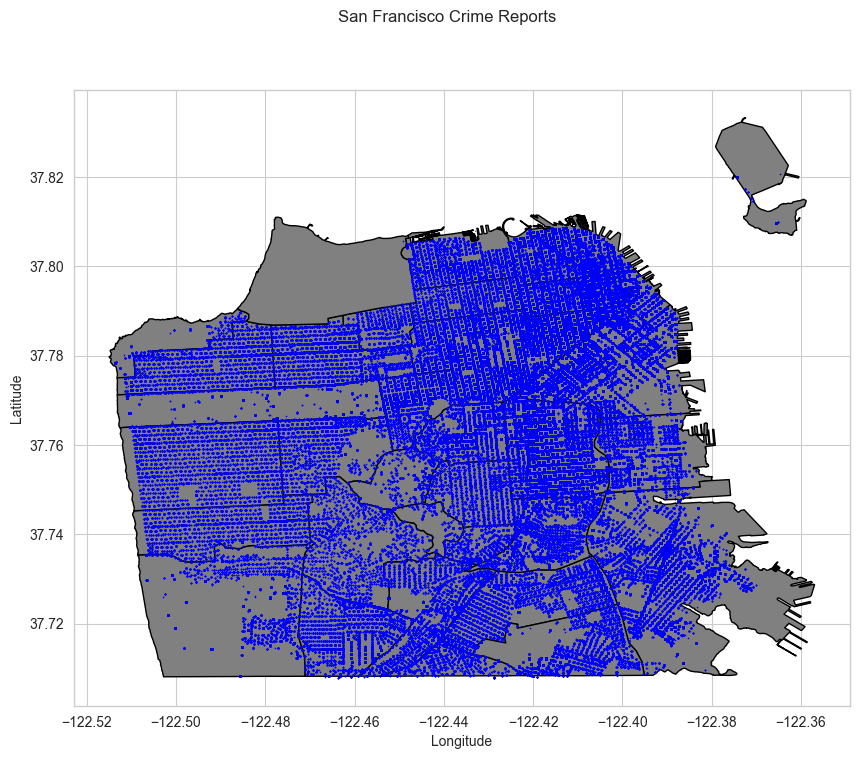

In [26]:
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = GeoDataFrame(geometry=geometry)

fig, ax = plt.subplots(figsize=(12, 8))
data = gpd.read_file("san-francisco.geojson")

data.plot(ax=ax, edgecolor='k', facecolor="Gray", alpha=1, linewidth=1) #, cmap="cividis")

gdf.plot(ax=ax, color='blue', markersize=0.5)

fig.suptitle('San Francisco Crime Reports', fontsize=12)
ax.set_xlabel('Longitude',  fontsize=10)
ax.set_ylabel('Latitude',   fontsize=10)